In [1]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from math import sqrt
import time
import numpy as np
import pandas as pd

## 1. Data Understanding & Exploration

### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [2]:
df_1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
df_2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df_2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_1_shape = df_1.shape
df_2_shape = df_2.shape

In [5]:
print(f' churn1 dataset: {df_1_shape} ; has rows: {df_1_shape[0]} ; has columns: {df_1_shape[1]}')
print(f' churn2 dataset: {df_2_shape}  ; has rows: {df_2_shape[0]}  ; has columns: {df_2_shape[1]}')

 churn1 dataset: (7043, 10) ; has rows: 7043 ; has columns: 10
 churn2 dataset: (7043, 12)  ; has rows: 7043  ; has columns: 12


### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
df=df_1.merge(df_2,left_on='customerID',right_on='customerID') 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(f' Entire dataset: {df.shape} ; has rows: {df.shape[0]} ; has columns: {df.shape[1]}')

 Entire dataset: (7043, 21) ; has rows: 7043 ; has columns: 21


### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [8]:
df1_cols = np.asarray(df_1.columns)
df2_cols = np.asarray(df_2.columns)
df_cols = np.asarray(df.columns)
print('Columns of df_1\n', df1_cols)
print('\nColumns of df_2\n',df2_cols)
print('\nColumns of df\n',df_cols)
print("\nComparison of both", np.logical_and((set(df1_cols).issubset(set(df_cols))), (set(df2_cols).issubset(set(df_cols)))))

Columns of df_1
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity']

Columns of df_2
 ['customerID' 'OnlineBackup' 'DeviceProtection' 'TechSupport'
 'StreamingTV' 'StreamingMovies' 'Contract' 'PaperlessBilling'
 'PaymentMethod' 'MonthlyCharges' 'TotalCharges' 'Churn']

Columns of df
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Comparison of both True


Observations

All the features in dataset1/Churn1 and dataset2/Churn2 are incorporated  and are merged in a dataFrame df.

## 2. Data Cleaning & Analysis

### A. Impute missing/unexpected values in the DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
perc = df.isnull().sum() * 100 / len(df)
miss = pd.DataFrame({'Percentage of missing values': perc})
miss

,Percentage of missing values
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [12]:
df.duplicated().sum()

0

In [13]:
for x in df_cols:
    print(f'The Unique values in the feature {x} : ')
    print(df[x].unique())
    print()

The Unique values in the feature customerID : 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

The Unique values in the feature gender : 
['Female' 'Male']

The Unique values in the feature SeniorCitizen : 
[0 1]

The Unique values in the feature Partner : 
['Yes' 'No']

The Unique values in the feature Dependents : 
['No' 'Yes']

The Unique values in the feature tenure : 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

The Unique values in the feature PhoneService : 
['No' 'Yes']

The Unique values in the feature MultipleLines : 
['No phone service' 'No' 'Yes']

The Unique values in the feature InternetService : 
['DSL' 'Fiber optic' 'No']

The Unique values in the feature OnlineSecurity : 
['No' 'Yes' 'No internet service']

The Unique values in the feature OnlineBackup : 

Observations

1. We can observe that the merged dataframe doesnt have any missing fields.
2. Dropping column customerID as it shows 1-1 mapping
3. MonthlyCharges and TotalCharges are converted to continuous variables.
4. Feature MultipleLines has  'No phone service' value which will will change to 'No' for making data clean 
5. The same with `No internet service` column, so that the columns will have few number of unique values.

In [14]:
df['MultipleLines']= df['MultipleLines'].replace('No phone service','No')
df.drop('customerID', axis = 1, inplace=True)
df = df.replace(['No internet service'],'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
for x in ['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    print(f' The Unique values in column {x} : ')
    print(df[x].unique())
    print()

 The Unique values in column MultipleLines : 
['No' 'Yes']

 The Unique values in column OnlineSecurity : 
['No' 'Yes']

 The Unique values in column OnlineBackup : 
['Yes' 'No']

 The Unique values in column DeviceProtection : 
['No' 'Yes']

 The Unique values in column TechSupport : 
['No' 'Yes']

 The Unique values in column StreamingTV : 
['No' 'Yes']

 The Unique values in column StreamingMovies : 
['No' 'Yes']



### B. Make sure all the variables with continuous values are of ‘Float’ type.

In [16]:
columns = ['MonthlyCharges', 'TotalCharges']
for x in columns:
    df[x] = pd.to_numeric(df[x], errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
#recheck
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
perc = df.isnull().sum() * 100 / len(df)
miss = pd.DataFrame({'Percentage of missing values': perc})
miss

,Percentage of missing values
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000


In [19]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Observations

1. As we see there are 11 null values in column TotalCharges and in the dataset entirely
2. As it just is too less , around 0.15 % of teh values in the total data we choose to drop these rows.

In [20]:
df.dropna(inplace=True)

### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

Observations

1. Column SeniorCitizen has type int64 and holds only categorical data.So we plot a pie chart for this
2. So, convert the SeniorCitizen column to a categorical variable.
3. Converting all object type datatypes to categorical to save memory
4. Renaming feature tenure to Tenure and gender to Gender for betterlook and clean data maintainance purpose.

In [23]:
df.rename(columns = {'tenure': 'Tenure', 'gender':'Gender'}, inplace = True)
df_col = df.columns
df_col

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
cols = [i for i in df_col if i not in ['MonthlyCharges', 'TotalCharges']]
for i in cols:
    df[i] = df[i].astype('category')
df.dtypes

Gender              category
SeniorCitizen       category
Partner             category
Dependents          category
Tenure              category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [25]:
df.select_dtypes(include='category').columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

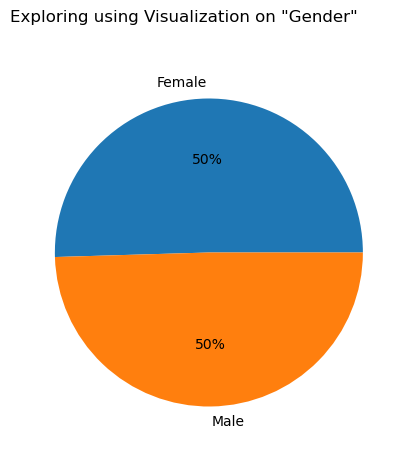

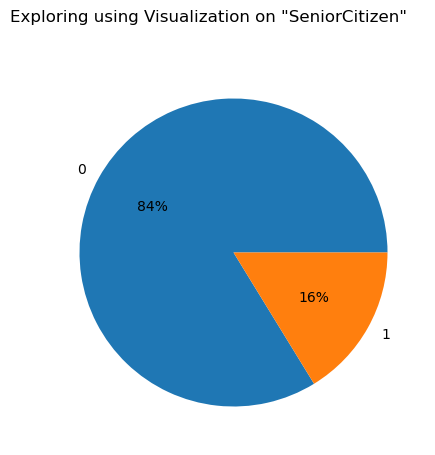

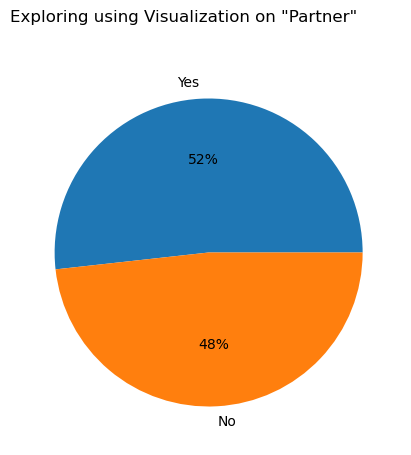

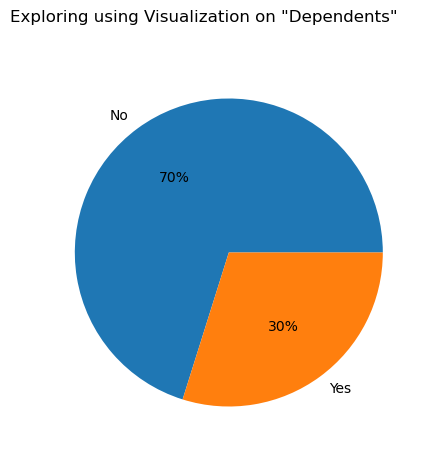

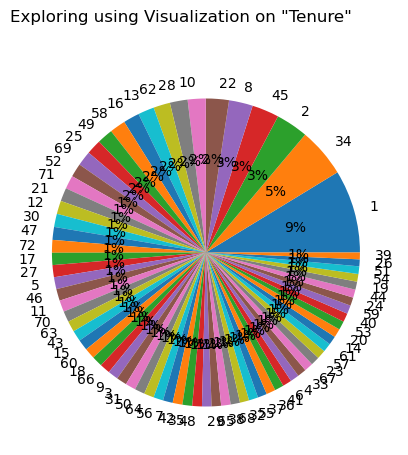

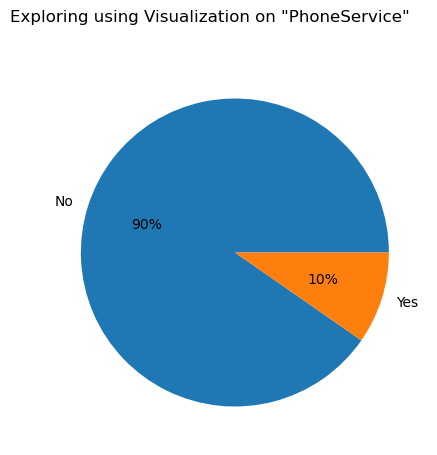

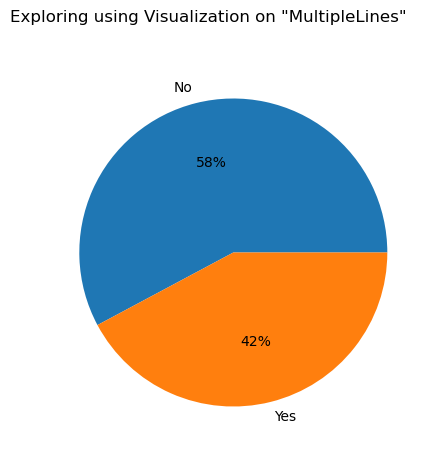

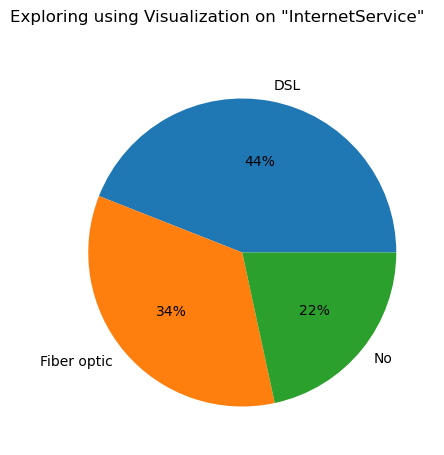

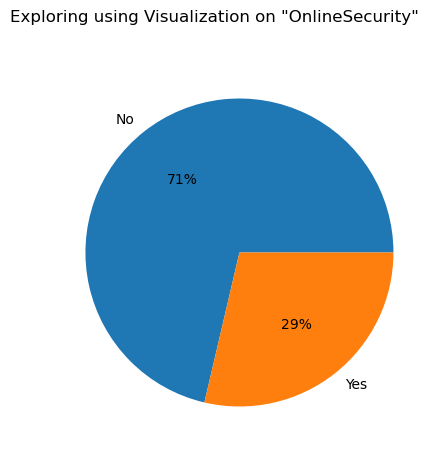

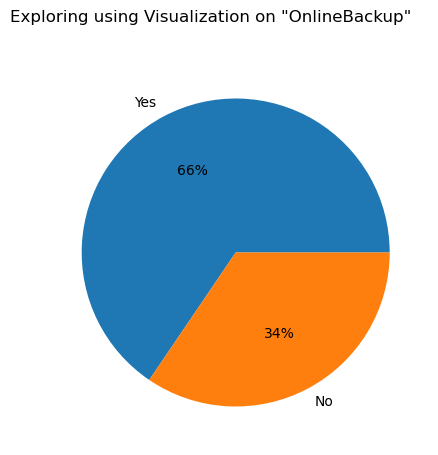

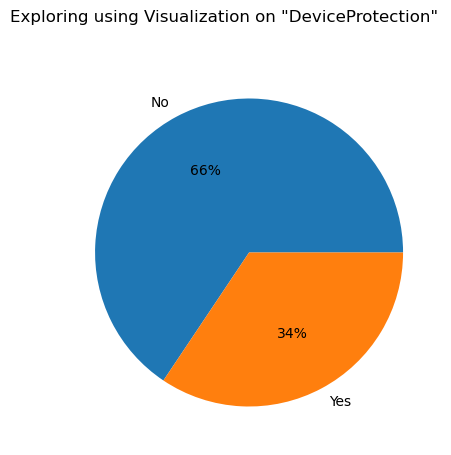

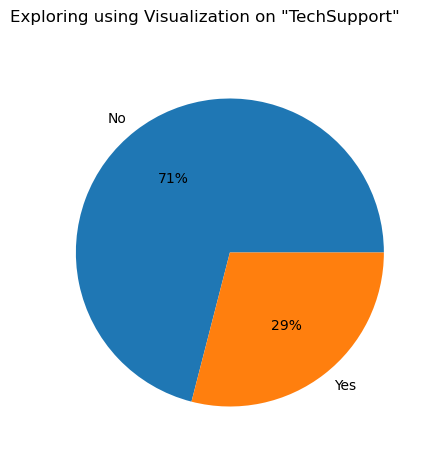

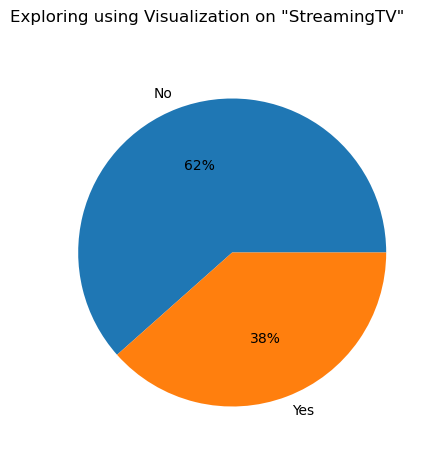

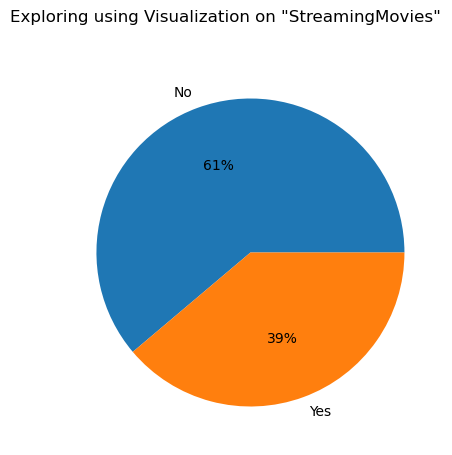

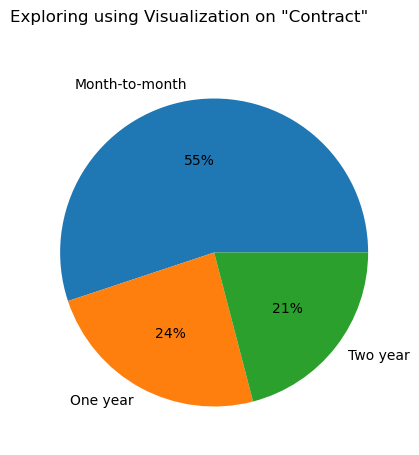

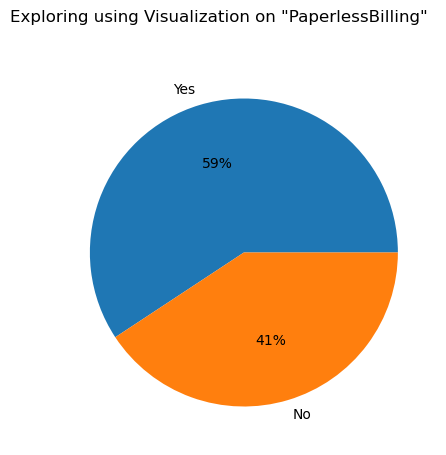

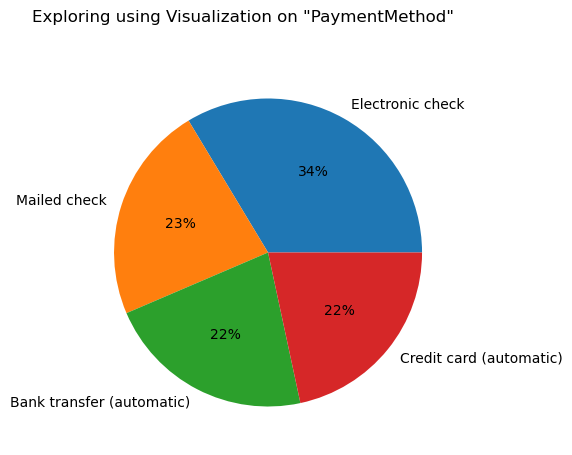

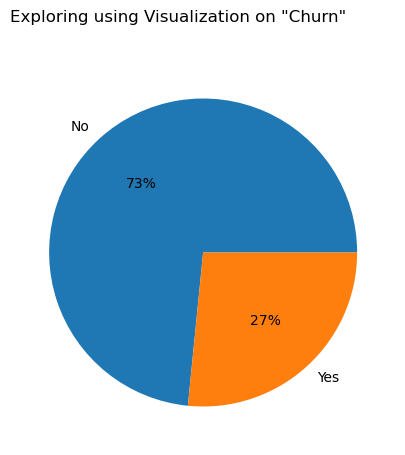

In [26]:
def df_pie_charts(df):
    categories = df.select_dtypes(include='category').columns
    for x in categories:
        fig , axes = plt.subplots(1,1, figsize=(20,5))
        axes.pie(df[x].value_counts(), labels = df[x].unique(), autopct='%.00f%%')
        fig.suptitle(f'Exploring using Visualization on "{x}"')
df_pie_charts(df)

### D. Share insights for Q2.c. 

Observations:

1. Gender feature:  we see Male & female have equal distribution 
2. SeniorCitizen feature: 84 % of the people are SeniorCitizen's.
3. Partner feature: equal distribution with 52% for yes and 48% for no
4. Dependents feature: The percentage of people that are not dependent are 70%
5. PhoneService feature:  The percentage of people that don't have phoneService are 90% 

6. InternetService feature: The percentage of people that don't have InternetService are   22% , the ones not consuming any internet services: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
7. Contract feature: The percentage of people that are in month-to-month contrac t are 55%
8. PaperlessBilling feature: The percentage of people that are PaperlessBilling are 59%
9. Churn feature: The percentage of people that dont come under default are 73%, with - churn (yes) feature: 27% and churn (no) feature:  73%, we clearly see an imbalance in the dataset

In [27]:
df.to_csv('final_df.csv', index= False)

### E. Encode all the appropriate Categorical features with the best suitable approach.

In [28]:
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])
print("\nDatatypes\n", df.dtypes)


Datatypes
 Gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
Tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [29]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,33,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,44,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### F. Split the data into 80% train and 20% test.

In [30]:
X=df.drop(columns='Churn')
y=df['Churn'] 
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,33,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,44,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [31]:
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

Observations

1. The dataset is imbalanced with churn(0) = 73 % and churn(1)= 26 %
2. Using SMOTE sampling technique to balance the output label and done only on training data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 19)
(5625,)
(1407, 19)
(1407,)


In [33]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print(X_train_smt.shape)
print(y_train_smt.shape)
print('\nBefore sampling:')
print(y_train.value_counts(normalize=True))
print('\nAfter sampling:')
y_train_smt.value_counts(normalize=True)

(8244, 19)
(8244,)

Before sampling:
0    0.7328
1    0.2672
Name: Churn, dtype: float64

After sampling:


0    0.5
1    0.5
Name: Churn, dtype: float64

### G. Normalize/Standardize the data with the best suitable approach.

In [34]:
not_categories = df.select_dtypes(exclude='int').columns
not_categories

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [35]:
for i in not_categories:
    X_test[i] = stats.zscore(X_test[i])
    X_train_smt[i] = stats.zscore(X_train_smt[i])
X_test.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1778,1,0,1,1,71,1,1,2,0,0,0,0,0,0,2,0,1,-1.318415,-0.178536
5036,0,1,1,0,15,1,1,1,0,0,0,0,0,1,0,1,1,0.712873,-0.397894
1106,0,0,0,0,62,1,1,1,0,1,0,0,1,1,2,0,0,1.118460,1.813064
1665,0,0,0,0,8,1,1,1,0,0,0,0,0,0,0,1,2,0.427956,-0.720437
927,0,0,0,0,12,1,0,1,0,1,1,0,0,0,0,1,2,0.572091,-0.589557


In [36]:
X_train_smt.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,3,-1.688659,-0.926486
1,1,0,0,1,65,1,0,2,0,0,0,0,0,0,2,0,3,-1.652138,-0.315993
2,1,0,1,1,70,1,1,0,1,1,1,1,1,1,2,0,2,0.777375,2.107972
3,0,0,1,0,71,1,1,1,1,1,1,0,1,0,2,0,0,1.133890,2.411941
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,-0.772157,-0.914460


## 3. Model building and Improvement

### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. 

In [37]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(random_state=0, eval_metric='mlogloss')
XGB_model.fit(X_train_smt,y_train_smt)

mean square error: 0.2515991471215352
root mean square error: 0.5015965979963731


In [78]:
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
print('mean square error:', MSE_XGB)
print('root mean square error:', RMSE_XGB)

mean square error: 0.23596304193319118
root mean square error: 0.4857602720820129


In [38]:
y_train_pred = XGB_model.predict(X_train_smt)
accuracy_score(y_train_pred, y_train_smt)

0.9569383794274624

In [39]:
accuracy_score(y_test, y_pred)

0.7484008528784648

In [40]:
confusion_matrix(y_test, y_pred)

array([[783, 258],
       [ 96, 270]], dtype=int64)

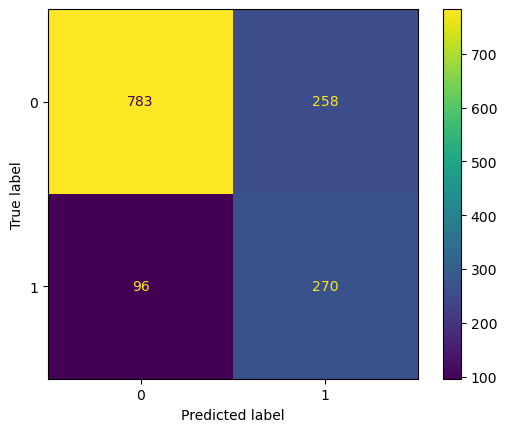

In [41]:
plot_confusion_matrix(XGB_model, X_test, y_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1041
           1       0.51      0.74      0.60       366

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



### Another Approach:  Common Model Implementation

In [43]:
def fit_n_print(model, X_train, X_test, y_train, y_test):     
    start = time.time()  
    model.fit(X_train, y_train)   
    pred = model.predict(X_test)     
    r2 = metrics.r2_score(y_test, pred)      
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))    
    rmsle = sqrt(metrics.mean_squared_log_error(y_test, pred))      
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   
    r2_cv = cv['test_r2'].mean()                                    
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) 
    rmsle_cv = np.mean([sqrt(msle) for msle in cv['test_msle']])
    end = time.time()   
    duration = end - start
    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, duration, pred 

XGB_model = XGBClassifier(random_state=0, eval_metric='mlogloss')
result = {}
for model, name  in zip([XGB_model], ['Xgboost']):
    result[name] = fit_n_print(XGB_model,X_train_smt, X_test,y_train_smt, y_test)
    
result_df = pd.DataFrame(result).T.iloc[:,:-1]
result_df.columns = ['R squared', 'RMSE', 'RMSLE', 'CV R squared', 'CV RMSE', 'CV RMSLE', 'Elapsed']
result_df

,R squared,RMSE,RMSLE,CV R squared,CV RMSE,CV RMSLE,Elapsed
Xgboost,-0.307271,0.501597,0.34768,0.365534,0.386762,0.268083,12.058328


### Model Tuning using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbc = XGBClassifier(seed = 20, eval_metric='mlogloss')
clf = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
XGB_model = XGBClassifier(seed = 20, eval_metric='mlogloss', colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 3, n_estimators= 100)
result = {}
for model, name  in zip([XGB_model], ['Xgboost']):
    result[name] = fit_n_print(XGB_model,X_train_smt, X_test,y_train_smt, y_test)
    
result_df = pd.DataFrame(result).T.iloc[:,:-1]
result_df.columns = ['R squared', 'RMSE', 'RMSLE', 'CV R squared', 'CV RMSE', 'CV RMSLE', 'Elapsed']
result_df

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE:  0.4412290300703833


,R squared,RMSE,RMSLE,CV R squared,CV RMSE,CV RMSLE,Elapsed
Xgboost,-0.226028,0.48576,0.336703,0.258726,0.42665,0.295731,5.241724


In [45]:
y_pred = XGB_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
print('mean square error:', MSE_XGB)
print('root mean square error:', RMSE_XGB)

mean square error: 0.23596304193319118
root mean square error: 0.4857602720820129


In [46]:
y_train_pred = XGB_model.predict(X_train_smt)
accuracy_score(y_train_pred, y_train_smt)

0.8247210092188259

In [47]:
accuracy_score(y_test, y_pred)

0.7640369580668088

In [48]:
confusion_matrix(y_test, y_pred)

array([[779, 262],
       [ 70, 296]], dtype=int64)

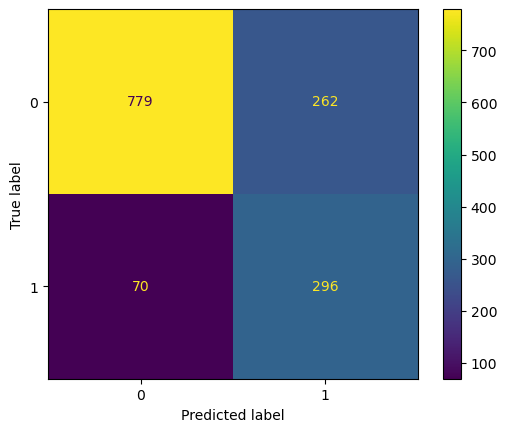

In [49]:
plot_confusion_matrix(XGB_model, X_test, y_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1041
           1       0.53      0.81      0.64       366

    accuracy                           0.76      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.76      0.78      1407



Observations

1. We can infer that the test accuracy foe testing increased from  74% to 76%
2. The best parameters are 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100
3. The best Root Mean Squared Error is 0.4879

# PART - B

Using the merged model  that is combination of both finalcsv of Churn 1 and churn 2.

In [51]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
path = os.getcwd()

In [73]:
"""
:param file - path of the file

This method takes in path of the file as input and outputs the csv file as a dataFrame.

"""
def read_csv(file):
    return pd.read_csv(file)
"""
:param df - dataFrame

This method takes the dataFrame as input and print the data info  
    - dataFrame shape,
    - no.of columns and rows
    - column names
    - categorical columns
    - non-categorical columns.

"""
def explore_data(df):
    df_shape = df.shape
    df_cols = df.columns 
    df_cat_cols = np.asarray(df.select_dtypes('object').columns)
    df_num_cols = np.asarray(df.select_dtypes('number').columns)
    print('\n 'f'The Shape of Dataset: {df_shape} ; Number of Rows in the Dataset: {df_shape[0]} ; Number of Columns in the Dataset: {df_shape[1]}')
    print('\n 'f' The Columns of the Dataset are: {df_cols}')
    print('\n The Features of the Dataset are: \n', df.dtypes)
    print('\n 'f'The Non-Categorical Features of the Dataset are: {df_num_cols}')
    print('\n 'f'The Categorical Features of the Dataset are:{df_cat_cols} \n')



In [53]:
"""
:param df - dataFrame

This method takes the dataFrame as teh input to handle the missingand null values

If the missing or null values percentage is lower than 10% of the entire data,
drop those rows containig or we impute the missing values using `mode_`

"""
def handling_missing_values(df):
    print('\n The Null Values : \n')
    null_val = np.asarray(df.isnull().sum())
    print(df.isnull().sum(), "\n")
    perc_miss = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'The percetange of missing values is': perc_miss})
    print('The Dataframe of Percentage of Missing Values :\n', missing_value_df)
    for i in df.columns:
        if perc_miss[i] > (len(df) / 10):
            mode_ = df[i].mode()[0]
            df[i].fillna(mode_, inplace=True)
        else:
            df[i].dropna(inplace=True)
    print(' The Missing values have been treated')
    return df

"""
:param df - dataFrame

This method takes the dataFrame as the input and handles the duplicate entries by dropping them

"""
def handling_duplicates(df):
    dup = df.duplicated()
    if sum(dup) > 0:
        df.drop_duplicates(inplace=True)
    print('The Duplicates have been Handled \n')
    print('---------------------------------')
    print('The Modified Data now looks like')
    return df

"""
:param df - dataFrame

This method outputs all the unique values of every column present in the dataset.

"""
def unique_val(df):
    for i in np.asarray(df.columns):
        print('\n'f'The Unique values in the Column {i} : is')
        print(df[i].unique())

In [81]:
"""
:param df - dataFrame

This method plots simple pair plot for the dataFrame.

"""
def graphs(df):
    target = np.asarray(df.columns)[-1]
    sns.pairplot(df);
    sns.pairplot(df,hue= target)

"""
:param df - dataFrame

This method checks for the correlation in the data.
If there are any high correlated columns (correlation > 0.95) - it handles by droppping the high correlated info

it returns the updated dataFrame

"""
def handling_extreme_corr(df):
    corr = df.corr().abs()
    print('\n Correlated Matrix \n', corr )
    upper_ = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
    print(upper_)
    drop_ = [col for col in upper_.columns if any(upper_[col] > 0.95)]
    print('\n Dropped Extreme Correlation ', drop_)
    df1 = df.drop(df.columns[drop_], axis=1)
    print("\n",df1.head())
    return df1

In [55]:
"""
:param df - dataFrame

This method takes input dataFrame, preprocess and cleans the data.

"""
def pre_process(df):
    explore_data(df)
    df = handling_missing_values(df)
    df = handling_duplicates(df)
    explore_data(df)
    unique_val(df)
    graphs(df)
    return handling_extreme_corr(df)
"""
:param df - dataFrame

This method takes input dataFrame and updates the data by using `zscore` to scale independent, returns an updated dataFrame.

"""
def normalise(df):
    non_cat_cols = np.asarray(df.select_dtypes(exclude = ['object']).columns)
    for i in non_cat_cols:
        df[i] = stats.zscore(df[i])
    return df

"""
:param df - dataFrame

This method takes input dataFrame, one_hot encodes categorical columns using `LabelEncoder`, returns an updated dataFrame.

"""
def encoding(df):
    le = LabelEncoder()
    for i in df.select_dtypes('object').columns:
        df[i] = le.fit_transform(df[i])
    return df

In [56]:
from imblearn.over_sampling import SMOTE

"""
:param X_train - training data with just teh features and without target info
:param y_train - target training data

This methods uses `SMOTE` to balance the data.

"""
def data_sampling(X_train, y_train):
    smt = SMOTE(random_state=42)
    X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
    return X_train_smt, y_train_smt

In [57]:
"""
:param X
:param y

This method splits data into train and test and looks if the traininig data is balanced.
If 15 % difference is seen between the target values we will return the balanced data, returns X_train, X_test, y_train, y_test

"""

def split_sampling(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
    x_train_shape = X_train.shape
    y_train_shape = y_train.shape
    print('\n ' f'The Shape of X_train: {x_train_shape} ; Number of Rows in the Dataset: {x_train_shape[0]} ; Number of Columns in the Dataset: {x_train_shape[1]}')    
    print('\n ' f'The Shape of Y_train: {y_train_shape} ; Number of Rows in the Dataset: {y_train_shape[0]} ; Number of Columns in the Dataset: {y_train_shape[1]}')
    target_val_cnt = y_train.value_counts(ascending=True, normalize=True).to_numpy()
    is_balancing_required = False
    for i in target_val_cnt:
        for j in target_val_cnt:
            if (abs(i-j)*100) > 15:
                is_balancing_required = True
                break
        if is_balancing_required:
            break

    if is_balancing_required :
        sampled_data = data_sampling(X_train, y_train)
        X_train_smt, y_train_smt = sampled_data
        X_train_smt_shape = X_train_smt.shape
        y_train_smt_shape = y_train_smt.shape
        print('--------------------------- AFTER SAMPLING ---------------------------------')
        print(f'X_train shape {X_train_smt_shape} ; number of rows: {X_train_smt_shape[0]} ; number of columns: {X_train_smt_shape[1]}')
        print(f'y_train shape {y_train_smt_shape} ; number of rows: {y_train_smt_shape[0]} ; number of columns: {y_train_smt_shape[1]}')
        X_train = X_train_smt
        y_train = y_train_smt

    return X_train, X_test, y_train, y_test

In [58]:
"""
:param model
:param X_train
:param X_test
:param y_train
:param y_test

Fits the train data into model and predicts the target values on test data.
Calculates the the metrics - `R squared, RMSE, RMSLE, ACCURACY`
Runs the cross_validation to find the given model
Returns the output metrics

"""

def fit_n_print(model, X_train, X_test, y_train, y_test):     
    start = time.time()  # save the start time 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)     
    r2 = metrics.r2_score(y_test, pred)    
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))       
    rmsle = sqrt(metrics.mean_squared_log_error(y_test, pred))  
    accuracy = metrics.accuracy_score(y_test, pred)    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
              'accuracy': metrics.make_scorer(metrics.accuracy_score)
               } 
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   
    r2_cv = cv['test_r2'].mean()                                   
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) 
    rmsle_cv = np.mean([sqrt(msle) for msle in cv['test_msle']]) 
    accuracy_cv = np.mean([sqrt(accuracy) for msle in cv['test_accuracy']]) 
    end = time.time()  #save the end tim    
    duration = end - start     
    return r2, rmse, rmsle, accuracy, r2_cv, rmse_cv, rmsle_cv, accuracy_cv, duration, pred  # return all the metrics along with predictions

In [59]:
"""
This method initialises Machine Learning Models
returns the machine learning models
"""
def model_initialize():
    dt = DecisionTreeClassifier(random_state=1) 
    bc = BaggingClassifier(random_state=1, n_estimators=50)
    ab = AdaBoostClassifier(random_state=1)
    rf = RandomForestClassifier(random_state=1, n_estimators=100) 
    gb = GradientBoostingClassifier(random_state=1, n_estimators=100)
    xgb = XGBClassifier(random_state=1, eval_metric='mlogloss')
    return dt, bc, ab, rf, gb, xgb

In [68]:
"""
:param df - dataFrame
executes all the above models and returns consolidated report

"""
def modelling(df):
    y = df.iloc[:, -1:]
    X = df.iloc[:,:-1]
    X_train, X_test, y_train, y_test = split_sampling(X,y)
    dt, bc, ab, rf, gb, xgb = model_initialize()
    
    result = {}   
    for model, name  in zip([ dt, bc, ab, rf, gb, xgb], ['Decision Tree','Bagging Ensemble', 
                                                    'Ada Boost Ensemble', 'Random Forest',
                                                    'Gradient Boost Ensemble', 'Extreme Gradient Boost Ensemble']):
        result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  

    result_df = pd.DataFrame(np.array(list(result.values()))[:,:-1],
                           columns= ['R Squared', 'MSE', 'MSLE', 'Accuracy', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Accuracy CV', 'Elapsed'],
                          index= result.keys())  

    result_df.index.name = 'Model'  
    print('------------------------------------------------------------------')
    return result_df, X, y

In [61]:
"""
:param model_name - machine learning Model name
returns the model and parms_grid to hypertune the parameters.

"""
model_config = {
    'Random Forest': {
        'params': {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [4, 7, 8, 9],
            'criterion': ['gini', 'entropy'],
        }, 
        'model': RandomForestClassifier(random_state=1, n_estimators=100)
    },
    
    'Extreme Gradient Boost Ensemble': {
        'params': {
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [100, 500, 1000],
            'colsample_bytree': [0.3, 0.7],
        },
        'model': XGBClassifier(seed=20, eval_metric='mlogloss')
    },
    
    'Gradient Boost Ensemble': {
        'params': {
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [100, 500, 1000],
            'colsample_bytree': [0.3, 0.7],
        },
        'model': GradientBoostingClassifier(random_state=1, n_estimators=100)
    },
    
    'Decision Tree': {
        'params': {
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'max_depth': [4, 7, 8, 9],
            'criterion': ['gini', 'entropy'],
        }, 
        'model': DecisionTreeClassifier(random_state=1) 
    },

    'Ada Boost Ensemble': {
        'params': {
            'n_estimators': [100, 500, 1000],
            'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
        }, 
        'model': AdaBoostClassifier(random_state=1)
    },
    
     'Bagging Ensemble': {
        'params': {
            'n_estimators': [100, 500, 1000]
        }, 
        'model': BaggingClassifier(random_state=1, n_estimators=50)
    }
 }


def model_specific_config(model_name):
    return model_config[model_name]
    

In [74]:
"""
Method gets the best model and looking into the consolidated report of all the models.

Returns the best model with best parameters

"""
def best_model(X, y):
    result_df = pd.read_csv('result_df.csv')
    model_name = result_df[result_df['RMSLE CV'] == result_df['RMSLE CV'].min()].iat[0,0]
    print(f'finding best params for {model_name}')
    config = model_specific_config(model_name)
    
    clf = GridSearchCV(estimator=config['model'], 
                   param_grid=config['params'],
                   scoring='neg_mean_squared_error', 
                   verbose=1)
    clf.fit(X, y)
    print('clf ->', clf)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
    
    return config['model'].set_params(**clf.best_params_)

In [75]:
import pickle
"""
:param model - machine Learning Model

This method stores the ML Model using pickle so that the model can be reused without re-created new model.
"""
def store_model(model):
    with open('model_pkl', 'wb') as files:
        pickle.dump(model, files)
    print('model stored successfully...!')

In [79]:
"""
:param file_name - dataset file name with extension (ex: data.csv)

This method takes the file_name as input and reads the data in that file, preprocess the data using some data cleaning techinques
runs the different Machine Learning Models to find the best model
after finding the best model - it will tune the hyper parameters of the model
re-updates the model with best params
stores the model using pickle

"""
def process(file_name):
    data_frame = read_csv(path + '/' + file_name)
    df = pre_process(data_frame)
    df = normalise(df)
    final_df = encoding(df)
    explore_data(final_df)
    print('\n ######### Final DataFrame ###########  ')
    print(final_df.head(), '\n')
    result_df, X, y = modelling(final_df)
    result_df.to_csv('result_df.csv')

    model = best_model(X, y)
    print('best model ->' , model)
    
    store_model(model)


 The Shape of Dataset: (7032, 20) ; Number of Rows in the Dataset: 7032 ; Number of Columns in the Dataset: 20

  The Columns of the Dataset are: Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 The Features of the Dataset are: 
 Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
P

------------------------------------------------------------------
finding best params for Random Forest
Fitting 5 folds for each of 48 candidates, totalling 240 fits
clf -> GridSearchCV(estimator=RandomForestClassifier(max_depth=8, n_estimators=500,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='neg_mean_squared_error', verbose=1)
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Lowest RMSE:  0.4457758627705362
best model -> RandomForestClassifier(max_depth=8, n_estimators=500, random_state=1)
Model Pickled Successfully...!


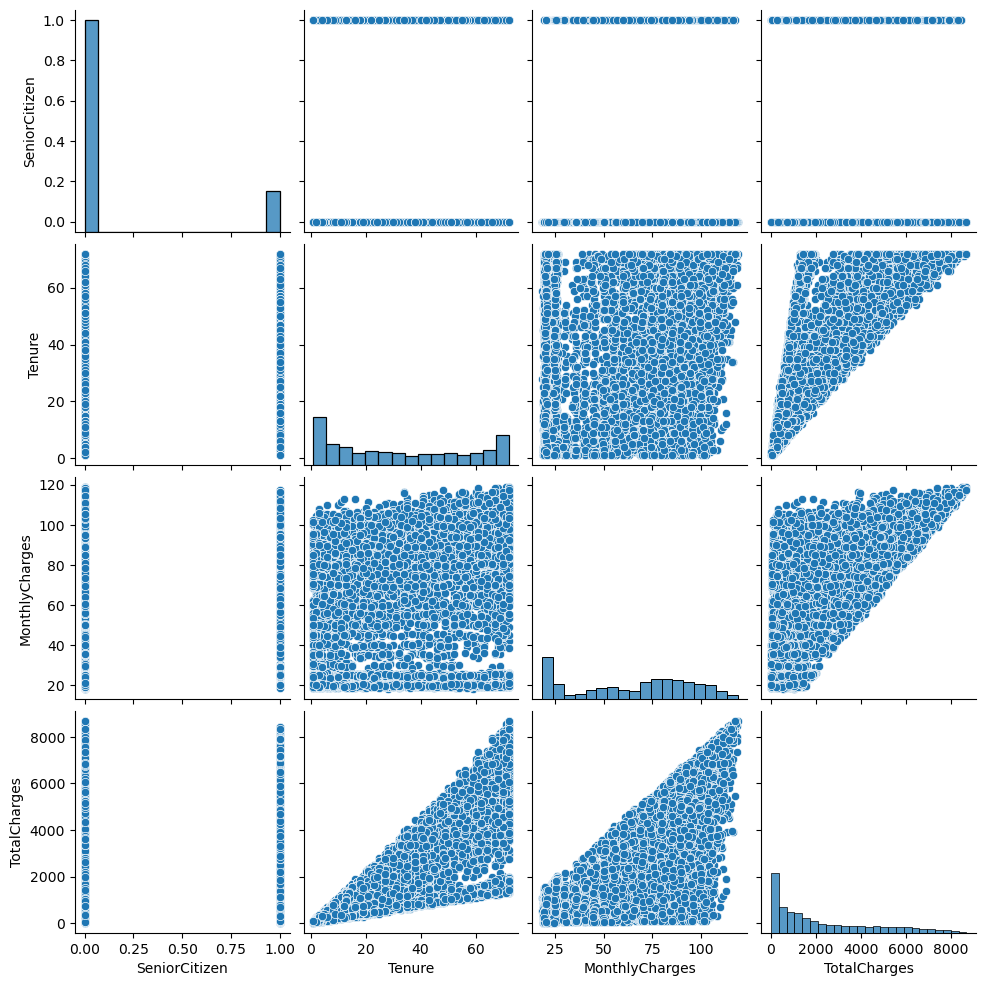

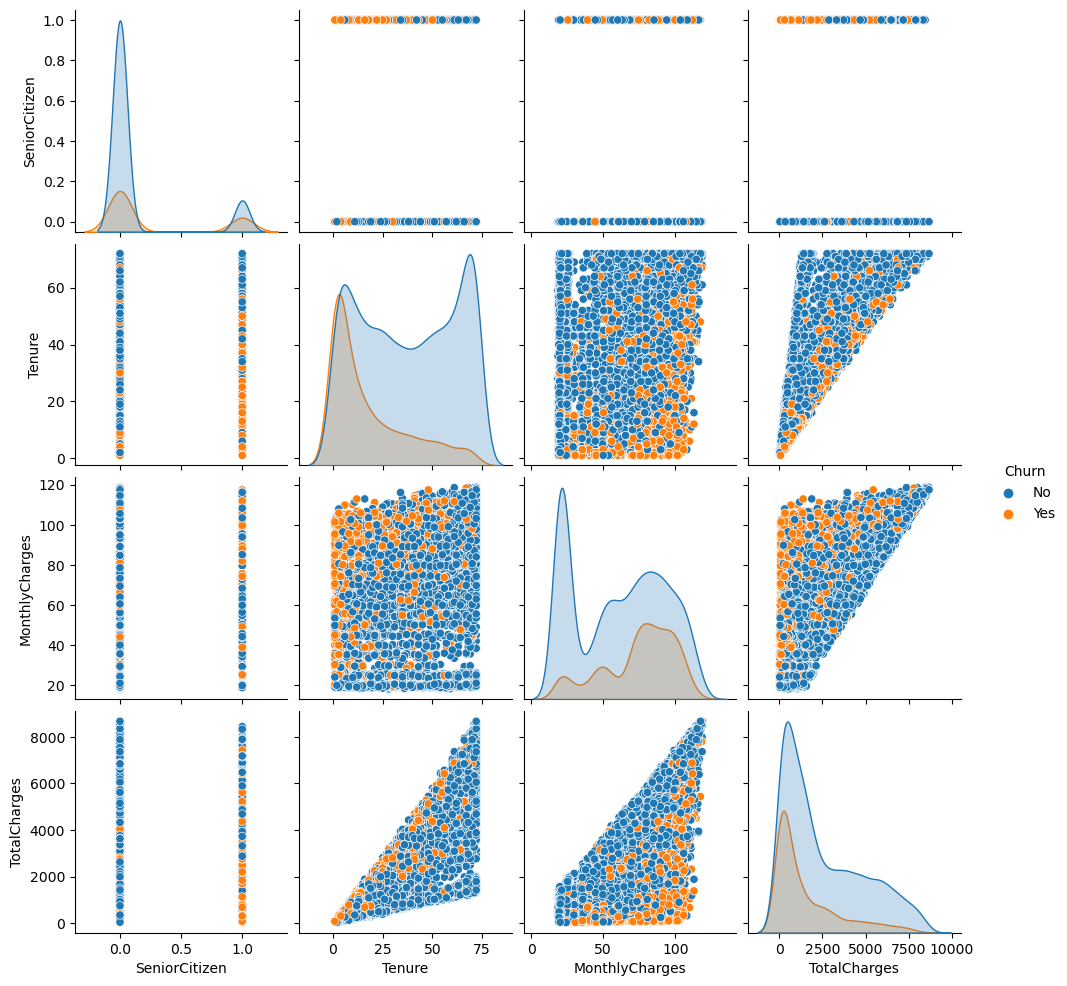

In [82]:
process('final_df.csv')